In [12]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [14]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

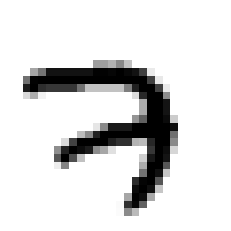

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

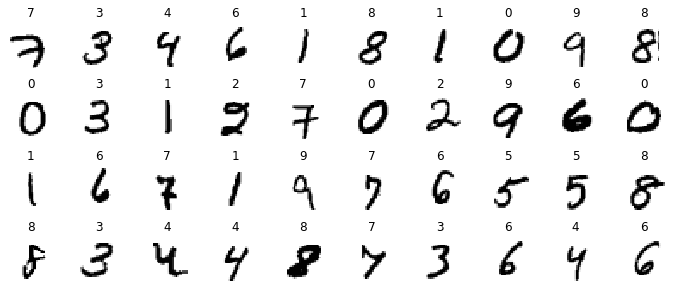

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [19]:
from keras.utils import np_utils
# one hot encode outputs
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)

# y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[7 3 4 ... 5 6 8]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(300,activation="sigmoid"))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [22]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.1631 - accuracy: 0.3647 - val_loss: 1.9366 - val_accuracy: 0.4854
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 1.5854 - accuracy: 0.6565 - val_loss: 1.2329 - val_accuracy: 0.7088
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0231 - accuracy: 0.7773 - val_loss: 0.8348 - val_accuracy: 0.8104
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7388 - accuracy: 0.8274 - val_loss: 0.6331 - val_accuracy: 0.8456
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5928 - accuracy: 0.8526 - val_loss: 0.5258 - val_accuracy: 0.8674
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5097 - accuracy: 0.8694 - val_loss: 0.4605 - val_accuracy: 0.8846
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4574 - accuracy: 0.8800 - val_loss: 0.4181 - val_accur

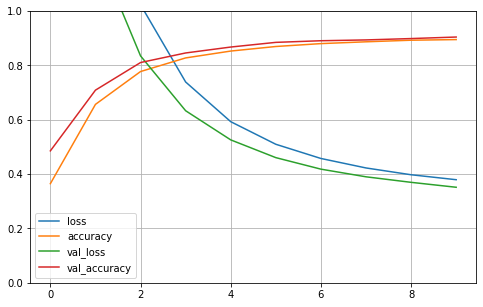

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3547 - accuracy: 0.9014


[0.354705810546875, 0.9014000296592712]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.5 , 0.05, 0.44, 0.91, 0.15, 0.43, 0.  , 1.  , 0.12, 0.97],
       [0.89, 0.27, 1.  , 0.92, 0.01, 0.9 , 0.97, 0.  , 0.86, 0.01],
       [0.  , 1.  , 0.77, 0.68, 0.17, 0.47, 0.29, 0.68, 0.54, 0.34]],
      dtype=float32)

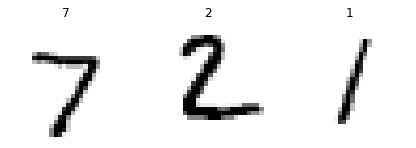

In [26]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()